Для 61 большого города в Англии и Уэльсе известны средняя годовая смертность на 100000 населения (по данным 1958–1964) и концентрация кальция в питьевой воде (в частях на миллион). Чем выше концентрация кальция, тем жёстче вода. Города дополнительно поделены на северные и южные.
water.txt

Постройте 95% доверительный интервал для средней годовой смертности в больших городах. Чему равна его нижняя граница? Округлите ответ до 4 знаков после десятичной точки.



Нас интересует только второй вариант, несмещённая оценка стандартного отклонения.

Чтобы не думать всё время о том, правильно ли вычисляется в вашем случае std(), можно всегда использовать std(ddof=1) (ddof — difference in degrees of freedom), тогда нормировка всегда будет на n-1.

In [1]:
import pandas as pd

In [5]:
data = pd.read_csv('water.txt', sep='\t')

In [6]:
data.head()

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18


In [7]:
data.describe()

,mortality,hardness
count,61.000000,61.000000
mean,1524.147541,47.180328
std,187.668754,38.093966
min,1096.000000,5.000000
25%,1379.000000,14.000000
50%,1555.000000,39.000000
75%,1668.000000,75.000000
max,1987.000000,138.000000


In [8]:
data.shape

(61, 4)

In [9]:
data.loc[8]

location        North
town         Bradford
mortality        1637
hardness           10
Name: 8, dtype: object

In [12]:
data.loc[range(8,12), 'location']

8     North
9     South
10    South
11    North
Name: location, dtype: object

In [13]:
data[data['location'] == 'South']

,location,town,mortality,hardness
0,South,Bath,1247,105
2,South,Birmingham,1466,5
7,South,Bournemouth,1299,78
9,South,Brighton,1359,84
10,South,Bristol,1392,73
12,South,Cardiff,1519,21
13,South,Coventry,1307,78
14,South,Croydon,1254,96
18,South,East Ham,1318,122
19,South,Exeter,1260,21


In [23]:
data[(data['location'] == 'South') & (data['town'] == 'Oxford')]

,location,town,mortality,hardness
37,South,Oxford,1175,107


In [16]:
data[(data['location'] == 'South') & (data['town'] == 'Oxford') & (data['hardness'] > 100)]

,location,town,mortality,hardness
37,South,Oxford,1175,107


In [18]:
data[(data['location'] == 'South') & ~(data['hardness'] > 100)]

,location,town,mortality,hardness
2,South,Birmingham,1466,5
7,South,Bournemouth,1299,78
9,South,Brighton,1359,84
10,South,Bristol,1392,73
12,South,Cardiff,1519,21
13,South,Coventry,1307,78
14,South,Croydon,1254,96
19,South,Exeter,1260,21
27,South,Leicester,1402,37
32,South,Newport,1581,14


Populating the interactive namespace from numpy and matplotlib


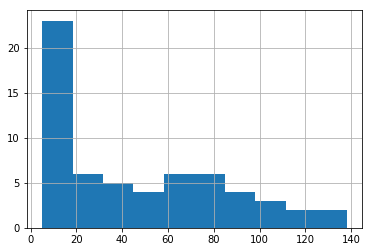

In [21]:
%pylab inline
data['hardness'].hist()

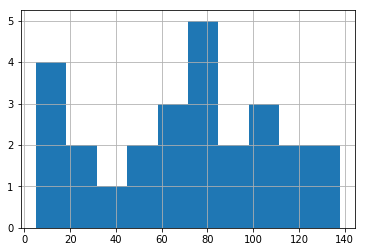

In [30]:
data[data['location'] == 'South']['hardness'].hist()

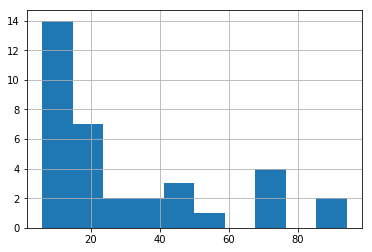

In [28]:
data[data['location'] == 'North']['hardness'].hist()

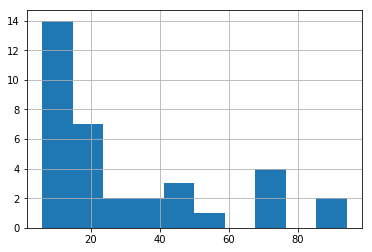

In [33]:
data.loc[data['location'] == 'North', 'hardness'].hist()

In [34]:
data['location'].value_counts()

North    35
South    26
Name: location, dtype: int64

In [35]:
data['town'].map(len)

0      4
1     10
2     10
3      9
4      9
5      6
6      6
7     11
8      8
9      8
10     7
11     7
12     7
13     8
14     7
15    10
16     5
17     9
18     8
19     6
20     9
21     7
22     7
23    12
24     4
25     7
26     5
27     9
28     9
29    10
      ..
31     9
32     7
33    11
34     7
35    10
36     6
37     6
38     8
39    10
40     7
41     7
42     8
43     9
44     9
45     7
46     9
47    11
48     8
49     9
50    13
51     9
52     5
53    10
54     7
55     8
56     7
57    13
58     8
59    13
60     4
Name: town, Length: 61, dtype: int64

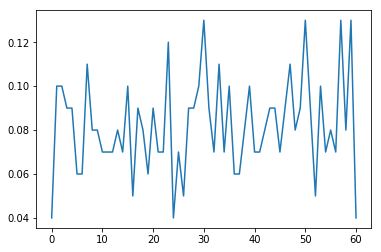

In [39]:
data['town'].map(len).map(lambda x: x/100.0).plot()

In [43]:
data.apply(sum)

location     SouthNorthSouthNorthNorthNorthNorthSouthNorthS...
town         BathBirkenheadBirminghamBlackburnBlackpoolBolt...
mortality                                                92973
hardness                                                  2878
dtype: object

In [44]:
from tqdm import tqdm_notebook

In [45]:
tqdm_notebook().pandas()

In [46]:
data['town'].progress_map(lambda x: x.count('e'))

0     0
1     2
2     0
3     0
4     0
5     0
6     1
7     1
8     0
9     0
10    0
11    1
12    0
13    1
14    0
15    0
16    1
17    1
18    0
19    2
20    2
21    0
22    0
23    2
24    0
25    0
26    2
27    3
28    1
29    2
     ..
31    2
32    1
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    1
41    1
42    1
43    1
44    2
45    0
46    2
47    0
48    1
49    0
50    1
51    0
52    1
53    1
54    1
55    1
56    0
57    1
58    1
59    1
60    0
Name: town, Length: 61, dtype: int64

In [47]:
data.corr()

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [48]:
data.corr().applymap(lambda x: int(x*100)/100)

,mortality,hardness
mortality,1,-1
hardness,-1,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1ac7ec48d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f1ac75f4710>]], dtype=object)

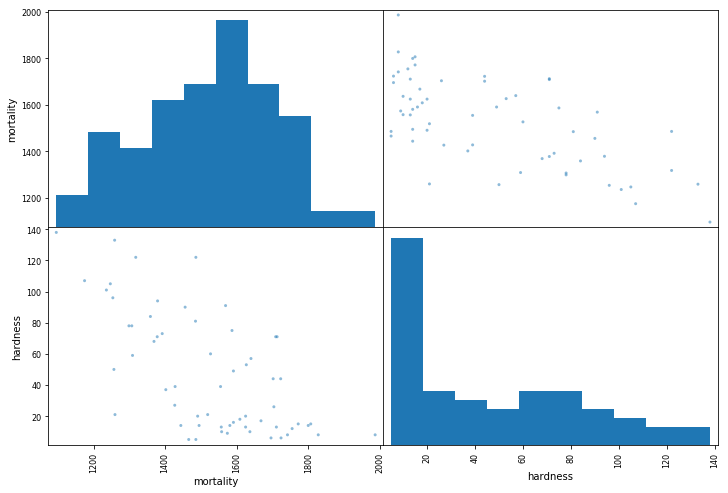

In [49]:
pd.plotting.scatter_matrix(data,figsize=(12,8))

In [59]:
data2 = data.loc[:,('town', 'hardness')]

In [60]:
data2.head()

,town,hardness
0,Bath,105
1,Birkenhead,17
2,Birmingham,5
3,Blackburn,14
4,Blackpool,18


In [61]:
data2.rename(columns={'town':'town2', 'hardness':'hardness2'}, inplace=True)

In [62]:
data2.head()

,town2,hardness2
0,Bath,105
1,Birkenhead,17
2,Birmingham,5
3,Blackburn,14
4,Blackpool,18


In [65]:
data3 = data2.loc[:]

In [69]:
data3.rename(columns={'town2': 'town', 'hardness2': 'hardness'})

,town,hardness
0,Bath,105
1,Birkenhead,17
2,Birmingham,5
3,Blackburn,14
4,Blackpool,18
5,Bolton,10
6,Bootle,15
7,Bournemouth,78
8,Bradford,10
9,Brighton,84


In [70]:
data3.head()

,town,hardness
0,Bath,105
1,Birkenhead,17
2,Birmingham,5
3,Blackburn,14
4,Blackpool,18


In [72]:
data.merge(data3, on=['town'])

,location,town,mortality,hardness_x,hardness_y
0,South,Bath,1247,105,105
1,North,Birkenhead,1668,17,17
2,South,Birmingham,1466,5,5
3,North,Blackburn,1800,14,14
4,North,Blackpool,1609,18,18
5,North,Bolton,1558,10,10
6,North,Bootle,1807,15,15
7,South,Bournemouth,1299,78,78
8,North,Bradford,1637,10,10
9,South,Brighton,1359,84,84


In [73]:
data.groupby('location')['mortality'].apply(sum).reset_index()

,location,mortality
0,North,57176
1,South,35797


In [74]:
dictionary = {}
for i, row in data.iterrows():
    dictionary[row['town']] = row['hardness']

In [75]:
dictionary

{'Bath': 105,
 'Birkenhead': 17,
 'Birmingham': 5,
 'Blackburn': 14,
 'Blackpool': 18,
 'Bolton': 10,
 'Bootle': 15,
 'Bournemouth': 78,
 'Bradford': 10,
 'Brighton': 84,
 'Bristol': 73,
 'Burnley': 12,
 'Cardiff': 21,
 'Coventry': 78,
 'Croydon': 96,
 'Darlington': 20,
 'Derby': 39,
 'Doncaster': 39,
 'East Ham': 122,
 'Exeter': 21,
 'Gateshead': 44,
 'Grimsby': 94,
 'Halifax': 8,
 'Huddersfield': 9,
 'Hull': 91,
 'Ipswich': 138,
 'Leeds': 16,
 'Leicester': 37,
 'Liverpool': 15,
 'Manchester': 8,
 'Middlesbrough': 26,
 'Newcastle': 44,
 'Newport': 14,
 'Northampton': 59,
 'Norwich': 133,
 'Nottingham': 27,
 'Oldham': 6,
 'Oxford': 107,
 'Plymouth': 5,
 'Portsmouth': 90,
 'Preston': 6,
 'Reading': 101,
 'Rochdale': 13,
 'Rotherham': 14,
 'Salford': 8,
 'Sheffield': 14,
 'South Shields': 71,
 'Southampton': 68,
 'Southend': 50,
 'Southport': 75,
 'St Helens': 49,
 'Stockport': 13,
 'Stoke': 57,
 'Sunderland': 71,
 'Swansea': 13,
 'Wallasey': 20,
 'Walsall': 60,
 'West Bromwich': 53,
 'W